## Assignment 03
Date : 12/2/2026

Import libraries: pandas,matplotlib,seaborn

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

**Ques-1** : Explain: Data Cleaning & Preprocessing 
* Load the dataset and check for missing values. 
* Fill missing Age values with median or mean. 
* Handle missing Embarked values by filling with the most common port. 
* Drop unnecessary columns like Name, Ticket, Cabin for visualization purposes.  

**Answer :**
* **Data Cleaning** : Data cleaning is the process of identifying and handling errors, noise, missing values, duplicates or inconsistency in the dataset to improve data reliability, quality and accuracy.
* **Data Preprocessing** : Data preprocessing is the process of transforming clean raw data into the suitable format[model-ready or machine-readable] for analysis or to trained the ML models on it, using techniques like encoding, normalization, scaling or feature selection* 

1. Load the dataset and check for missing values.

In [59]:
# load dataset using pandas library
data = pd.read_csv(r".\train.csv")

In [60]:
# print(data) ## not return data in  tabular form or say dataframe so use directly data to print
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [61]:
# check for missing values
data.isnull() # True --> value is missing represents as NaN, False--> Value is not missing

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [62]:
# calculate the no. of missing values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Total Values/ data  = 891
- Missing Values in Feature 'Age' = 177 out of 891
- missing values in feature 'Cabin' = 687 out of 891 -- high risk better to drop that feature
- missing values in feature 'Embarked' = 2 out of 891 -- negligible but better to fill this not drop


2. Fill missing Age values with median or mean

In [63]:
# fill  missing value with mean
data['Age']=data['Age'].fillna(data['Age'].mean())  ## fillna(value) is used to fill the missing values with value (mean of age) 

In [64]:
data.isnull().sum()
## now you clearly see their is no missing values in the feature 'Age'

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [65]:
data[data['Age']=='NaN']  #3 check if their is missing values (NaN)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


3. Handle missing Embarked values by filling with the most common port.
- Embarked values is categorical so fill missing values with mode imputation ( fill with most frequently occuring value)

In [66]:
# Check most frequently occuring values 
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [67]:
## 'S' --> most frequently occuring value
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])   ## mode() --> returns the list of frequently occuring elements in descending order
## mode()[0] --> take first value of the list return by mode() as it descending order so first values is most frequently occuring value

In [68]:
data.isnull().sum()
## now you see Embarked missing values is handled

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

4. Drop unnecessary columns like Name, Ticket, Cabin for visualization purposes.

In [69]:
data.duplicated().sum()  # there is no duplicated value in this so no need to drop duplicates

np.int64(0)

In [70]:
# as we seen before that missing value in feature cabin is high so better to drop
data.drop('Cabin',axis=1,inplace=True)

In [71]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='str')

In [72]:
# drop feature Name as it doesn't have any role in model training
data.drop('Name',axis=1,inplace=True)

In [73]:
# drop feature Ticket 
data.drop('Ticket',axis=1,inplace=True)

In [74]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='str')

**Ques-2** : Univariate Analysis 
* Plot the distribution of Age using a histogram and a KDE plot. 
* Plot the count of passengers by Sex using a bar chart. 
* Show the distribution of Fare using a boxplot


**Answer : ** **Univariate Analysis** : use one variable at a time


1. Plot the distribution of Age using a histogram and a KDE plot.

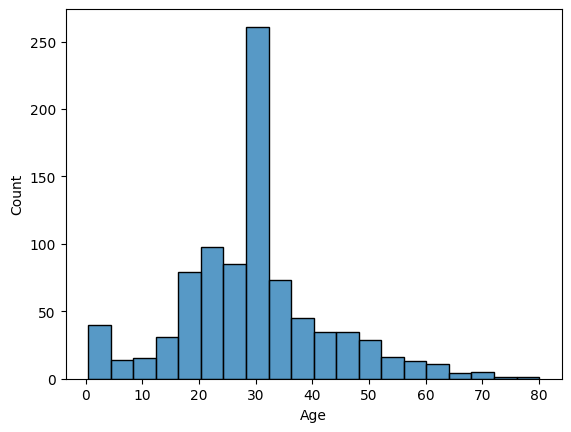

In [ ]:
# Hist-Graph shows the actual frequency of data in bins(intervals)
sns.histplot(data['Age'],bins=20)  # argument bins is used define the number of intervals
plt.show()

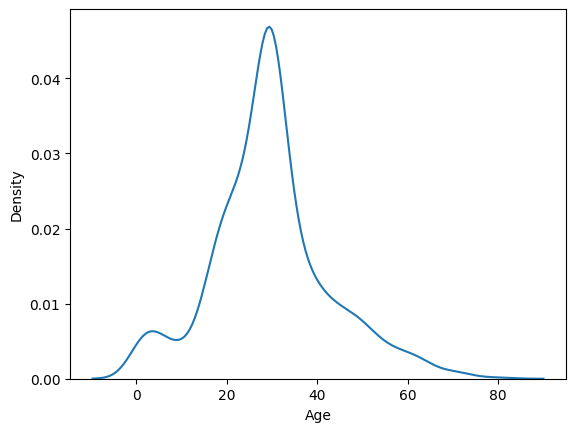

In [ ]:
# kde-graph shows a smooth estimated probability distribution of the data (curve)
sns.kdeplot(data['Age'])
plt.show()

2. Plot the count of passengers by Sex using a bar chart.

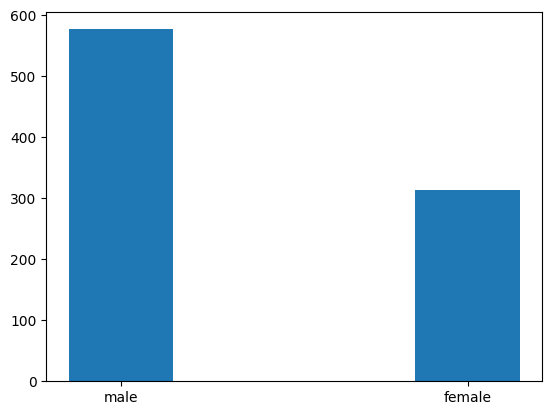

In [92]:
pass_no=data['Sex'].value_counts() # returns series of unique values(categorical data or say index) and their number(values)
# so basically series have two parts index and values , index--> categorical data , values --> No of occurence of corresponding to that index
plt.bar(pass_no.index,pass_no.values,width=0.3)
plt.show()



3. Show the distribution of Fare using a boxplot

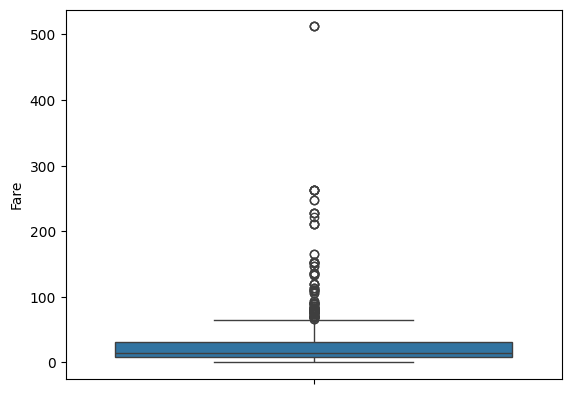

In [ ]:
# Boxplot is used to visualize the distribution, central tendency(median), spread, and outliers of a datasets
sns.boxplot(data['Fare'])
plt.show()

**Ques-3** : Bivariate Analysis 
* Compare survival rate across Sex using a countplot. 
* Compare Pclass vs Fare using a boxplot. 
* Visualize Age vs Fare using a scatter plot, color-coded by Survived.


**Answer :**
Bivariate Analysis : studying the relationship between two variables

1. Compare survival rate across Sex using a countplot.

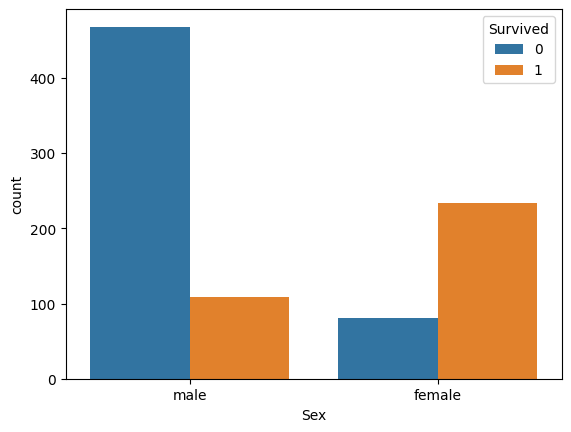

In [94]:
sns.countplot(x = 'Sex', hue='Survived', data=data)
plt.show()

from above graph , survival rate of women is more than male

2. Compare Pclass vs Fare using a boxplot.

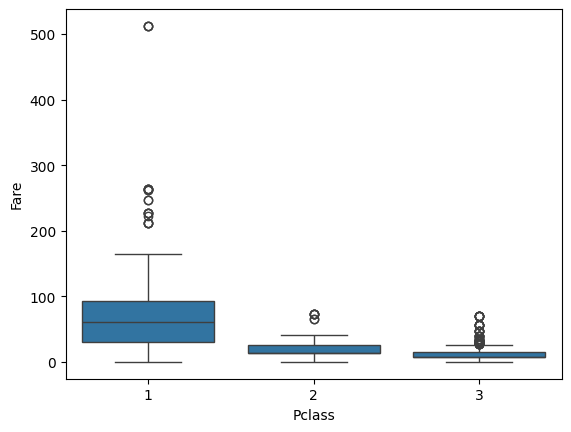

In [95]:
sns.boxplot(x = 'Pclass',y = 'Fare',data = data)
plt.show()

*Explanation* : 1st Pclass pay high Fare(ticket price), 2nd Pclass pay medium Fare and 3rd Pclass pay low Fare

3. Visualize Age vs Fare using a scatter plot, color-coded by Survived.

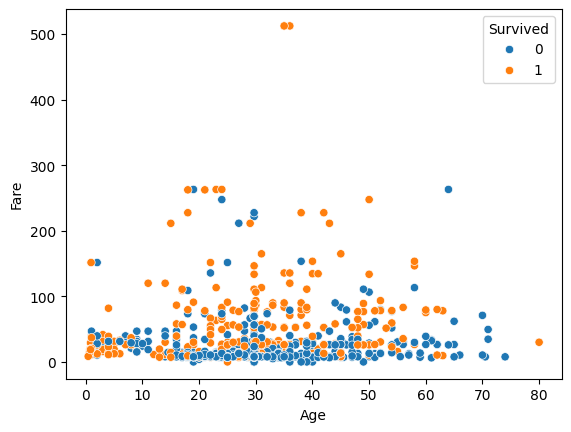

In [98]:
sns.scatterplot(x = 'Age',y = 'Fare',hue='Survived',data=data) ## here youn use hue for color-coded and allow comparison also on basis specified hue.
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

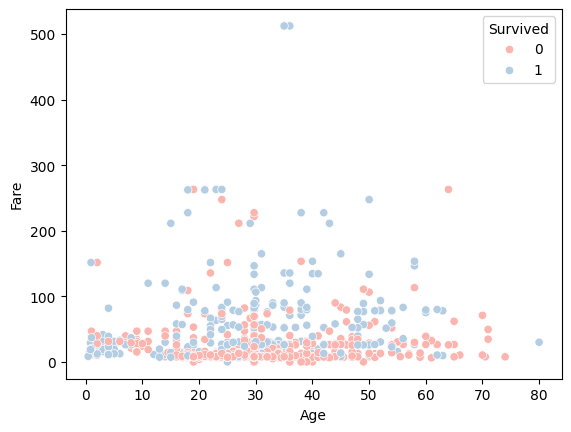

In [ ]:
sns.scatterplot(x = 'Age',y = 'Fare',hue='Survived',palette='Pastel1',data=data)
## you can change by-default color using palette , use of predefined colour palette 
plt.show

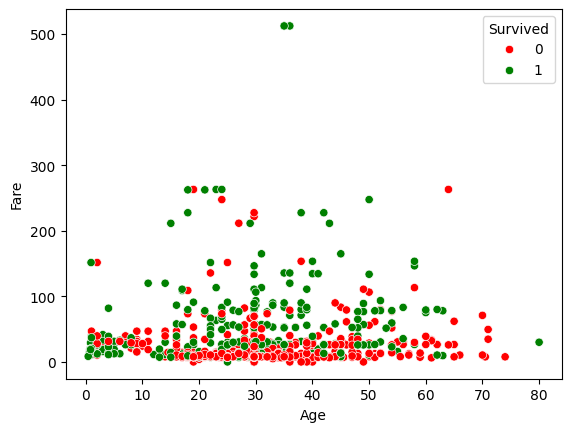

In [ ]:
# you can also define colour palette
sns.scatterplot(x = 'Age',y = 'Fare',hue='Survived',palette={0:'red',1:'green'},data=data)
## here 0(non-survived)-->denoted by colour red and 1(survived)-->denoted by colour green , 0 and 1 are the values of the feature pass to hue
plt.show()